In [11]:
import pandas as pd

df = pd.read_csv("housing.csv")

df.sample()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1185,-121.52,39.48,21.0,2628.0,494.0,1364.0,468.0,2.0455,59400.0,INLAND


In [4]:
df.shape

(20640, 10)

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [13]:
home_data = pd.read_csv("housing.csv", usecols= ['longitude', 'latitude', 'median_house_value'])
home_data.sample(5)

,longitude,latitude,median_house_value
10863,-117.88,33.71,184900.0
4523,-118.21,34.04,148400.0
662,-122.13,37.70,223100.0
11228,-117.94,33.81,172200.0
4132,-118.21,34.13,214200.0


<Axes: xlabel='longitude', ylabel='latitude'>

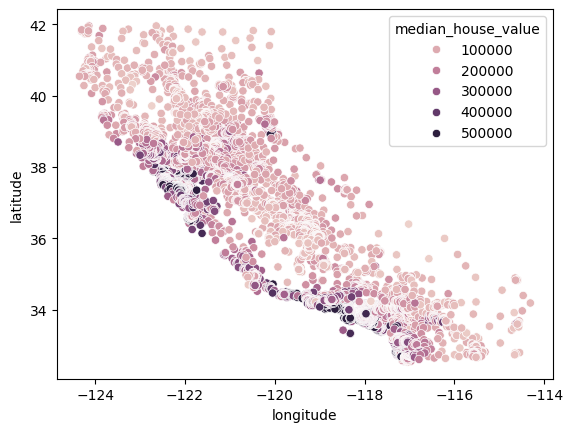

In [16]:
import seaborn as sns

sns.scatterplot(data = home_data, x = 'longitude' , y = 'latitude' , hue='median_house_value')

In [21]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(home_data[['longitude','latitude']] , home_data[['median_house_value']] , \
    test_size = 0.3 , random_state =2)

In [28]:
X_train['latitude'].describe()

count    14448.000000
mean        35.621174
std          2.140286
min         32.540000
25%         33.930000
50%         34.250000
75%         37.710000
max         41.950000
Name: latitude, dtype: float64

In [37]:
X_train.describe()

,longitude,latitude
count,14448.000000,14448.000000
mean,-119.555761,35.621174
std,2.003547,2.140286
min,-124.350000,32.540000
25%,-121.770000,33.930000
50%,-118.480000,34.250000
75%,-118.010000,37.710000
max,-114.310000,41.950000


In [23]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [36]:
pd.DataFrame(X_train_norm).describe()

,0,1
count,14448.000000,14448.000000
mean,-0.958358,0.285307
std,0.003535,0.011713
min,-0.963465,0.267835
25%,-0.961140,0.276061
50%,-0.960489,0.278318
75%,-0.955486,0.295038
max,-0.944706,0.327918


In [40]:
from sklearn.cluster  import KMeans

kmeans_model = KMeans(n_clusters = 3 , random_state = 10 , n_init = "auto")

In [41]:
kmeans_model


KMeans(n_clusters=3, random_state=10)

In [42]:
kmeans_model.fit(X_train_norm)

KMeans(n_clusters=3, random_state=10)

In [43]:
kmeans_model.cluster_centers_

array([[-0.96115905,  0.27597659],
       [-0.95562252,  0.29457828],
       [-0.95174437,  0.30684578]])

In [55]:
pd.unique(pd.Series(kmeans_model.labels_))

array([0, 2, 1], dtype=int32)

In [45]:
len(kmeans_model.labels_)

14448

In [46]:
len(X_train_norm)

14448

<Axes: xlabel='longitude', ylabel='latitude'>

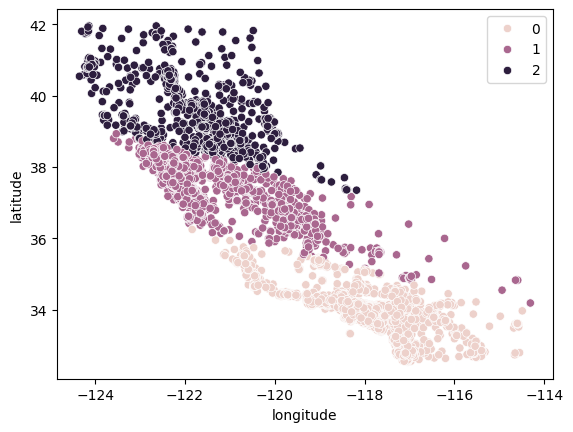

In [58]:
sns.scatterplot(data = X_train, x = 'longitude' , y = 'latitude' , hue=kmeans_model.labels_)

<Axes: ylabel='median_house_value'>

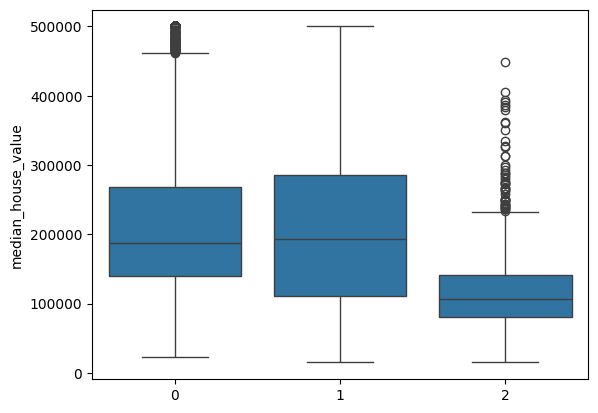

In [59]:
sns.boxplot(x = kmeans_model.labels_, y = y_train["median_house_value"])

In [62]:
K = range(2,8)

from sklearn.metrics import silhouette_score as ss

fits = []
scores  =  []



for k in K:
    kmeans_model = KMeans(n_clusters = k , random_state = 10 , n_init = "auto")
    kmeans_model.fit(X_train_norm)
    fits.append(kmeans_model)
    scores.append(ss(X_train_norm, kmeans_model.labels_  ))




<Axes: xlabel='longitude', ylabel='latitude'>

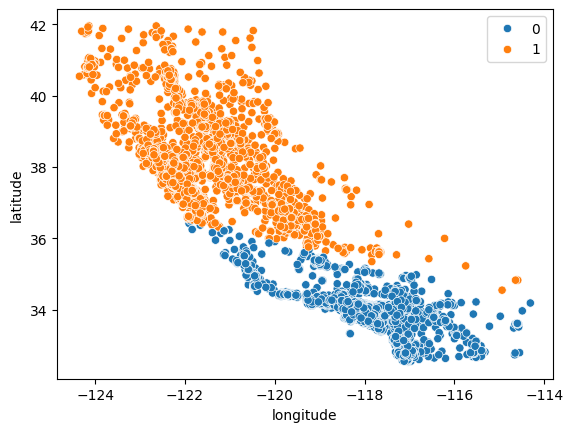

In [63]:
sns.scatterplot(data = X_train, x = 'longitude' , y = 'latitude' , hue=fits[0].labels_)

<Axes: xlabel='longitude', ylabel='latitude'>

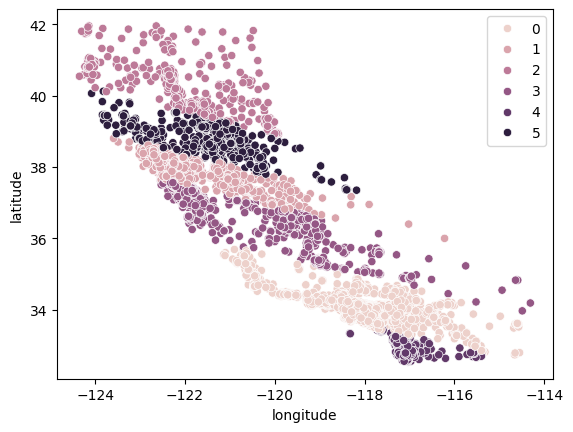

In [64]:
sns.scatterplot(data = X_train, x = 'longitude' , y = 'latitude' , hue=fits[4].labels_)

In [65]:
scores

[np.float64(0.7773203694376785),
 np.float64(0.7525039085893401),
 np.float64(0.7013004012379154),
 np.float64(0.6382251650670938),
 np.float64(0.6315547570172918),
 np.float64(0.6424491144661779)]

<Axes: >

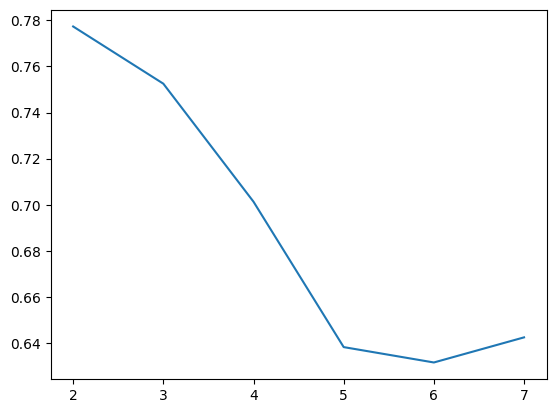

In [66]:
sns.lineplot(x = K , y = scores)

In [69]:
len(fits)

6

<Axes: ylabel='median_house_value'>

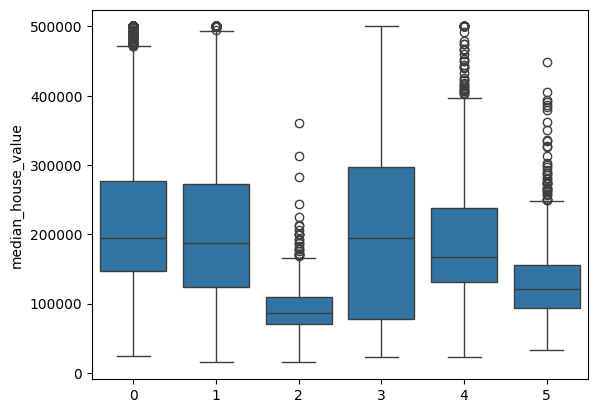

In [68]:
sns.boxplot(x = fits[4].labels_, y = y_train["median_house_value"])